# **DCT** and **thresholding** combined
1. Like ♪♫ [Tina Turner and Cher](https://youtu.be/sYFprizVGh0?t=282) ♫♪
2. Or... ["the double trouble"](https://youtu.be/3yfYetkMLPM)!

In [1]:
from sys import argv
from numpy import linspace as lp, random, ones, arange
from scipy.fftpack import dct, idct
from math import pi as π
from matplotlib.pyplot import (plot, show, title, xlabel, bar, legend)

L, intervals, rng = 0x100, 1, random.default_rng()
X, (f1, f2) = lp(0, 1.0, L), (0b101, 0b1110) # ♪♫ I'll be seeing you again!         https://youtu.be/xYQ2rJUT0Vg?t=101
                                             #    I'll be seeing you in Hertz's! ♫♪ https://youtu.be/0o4yv6Cm_ag

# [Photo...](https://en.wikipedia.org/wiki/Photoplethysmogram#Monitoring_heart_rate_and_cardiac_cycle)? [Plethys...](https://en.wikipedia.org/wiki/Photoplethysmogram#Monitoring_depth_of_anesthesia)?? PPG-like signal!
♪♫ [Here come the rain [of photons] again](https://www.youtube.com/watch?v=TzFnYcIqj6I) ♫♪  (albeit in their usual random and Poissonian fashion...)


In [2]:
# %%script false --no-raise-error

from numpy import abs, cos
from itertools import repeat; from more_itertools import flatten

name = 'PPG-like signal'
s = 0o10 + 0b100*cos(f1 * π*X) + 0b10*cos(f2 * π*X); s = list(flatten(repeat(s, intervals)))
S, T = rng.poisson(s), π*(π + 2)

## [Square wave](https://en.wikipedia.org/wiki/Square_wave) (a.k.a. a digital signal?)

A 'pure' square wave has the following transform:
$$
s(x) = \frac{4}{\pi}\sum_{n = 1}^{\infty}\lambda_n\cos(2\pi x(2n - 1))
$$
and hence the Fourier coefficients $\lambda_n = (2n - 1)^{-1}$ vanish rather slowly... A square wave below is less regular but its coefficients vanish equally slow (the order of decrease is the same).

In [3]:
# %%script false --no-raise-error

from numpy import sqrt, cos, sign, zeros
from itertools import repeat; from more_itertools import flatten
name = 'square wave'
_s = sign(sqrt(1/0b101)*cos(f1 * π*X)) - sign(sqrt(1/0b101)*cos(f2 * π*X))
s, ε = list(flatten(repeat(_s, intervals))), rng.standard_normal(L * intervals)/0b100 # zeros(L * intervals)
S = s + ε
T = π/2

## Chirp-like [LIGO](https://www.youtube.com/watch?v=TWqhUANNFXw) signal
This is a famous example of a signal which is associated with a collision of two massive objects (like black holes or neutron/quark stars - if the latter exist) and represents the fluctuation of the gravitational field, see:
1. [Veritasium](https://www.youtube.com/watch?v=iphcyNWFD10)
2. [MIT](https://www.youtube.com/watch?v=B4XzLDM3Py8)


In [4]:
# %%script false --no-raise-error

from numpy import sin, linspace as lp
name = 'gravitational chirp'
X = lp(0.05, 1.0, L * intervals)
s, ε = sin(1/X), rng.standard_normal(L * intervals)/0b100
S = s + ε
T = π/2

# [Transformation](https://youtu.be/3XSaN4zfEm0?t=42) and its [power](https://youtu.be/4zIoElk3r2c)!

Text(0.5, 1.0, '1. Raw gravitational chirp')

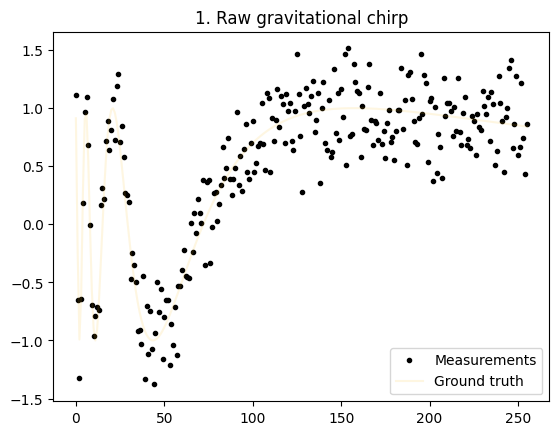

In [5]:
## Checkpoint I
plot(S, 'k.'); plot(s, 'xkcd:orangey yellow', alpha = 0b1/0o10)
legend(['Measurements', 'Ground truth']); title(f'1. Raw {name}')

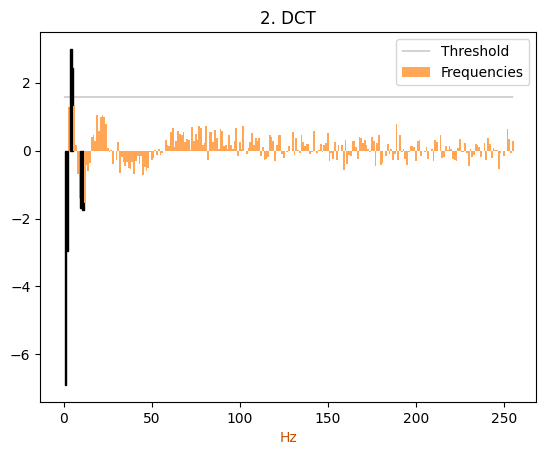

In [6]:
FS = dct(S, norm = 'ortho')
# A DC component is usually important, but not here and now...
# (Note that DC and DCT only look and sound similarly!)
DC = FS[0]; FS[0] = 0
Hz = arange(FS.shape[0])/intervals
___, lw = ones(len(Hz)) * T, 1/0b100 # Just a threshold line

## Checkpoint II: A frequency domain representation
bars, pplot = bar(Hz, FS, color = 'xkcd:pale orange', width = 1.0), plot(Hz, ___, 'k', lw = lw)
legend(['Threshold', 'Frequencies']); title('2. DCT'); xlabel('Hz', color = 'xkcd:dark orange')

# ... and a bit of threshold drama too (in the "Orange is the new black" style)
# https://www.imdb.com/title/tt2372162/trivia/?item=tr2033915
# That is, changing colors of "any bar bars above" ♪♫ Back to black ♫♪ https://youtu.be/TJAfLE39ZZ8?t=17
abba = lambda x: abs(x.get_height()) > pplot[0].get_data()[1][1]
for hibar in (fubar for fubar in bars if abba(fubar)): hibar.set_color('xkcd:black')

Text(0.5, 0, 'Hz')

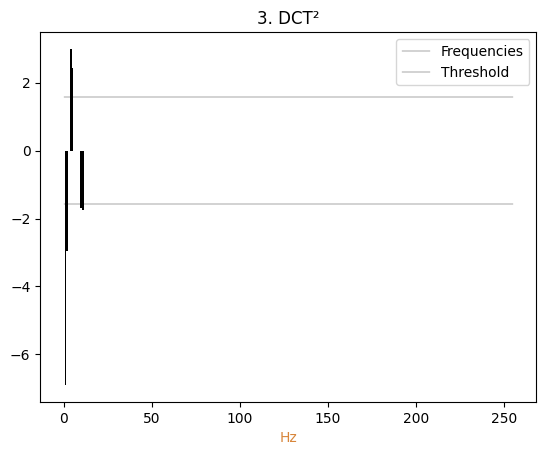

In [7]:
## Checkpoint III: A fast'n'ferocius'in'frequency domain data processing (a.k.a. L₁-like regularization)
FS[abs(FS) < T] = 0

# No drama, just good ole ♪♫ Back in black! ♫♪ https://youtu.be/pAgnJDJN4VA?t=10
bar(Hz, FS, color = 'k', width = 1.0); plot(Hz, ___, 'k', lw = lw); plot(Hz, -___, 'k', lw = lw)
legend(['Frequencies', 'Threshold']); title('3. DCT²'); xlabel('Hz', color = 'xkcd:dull orange')

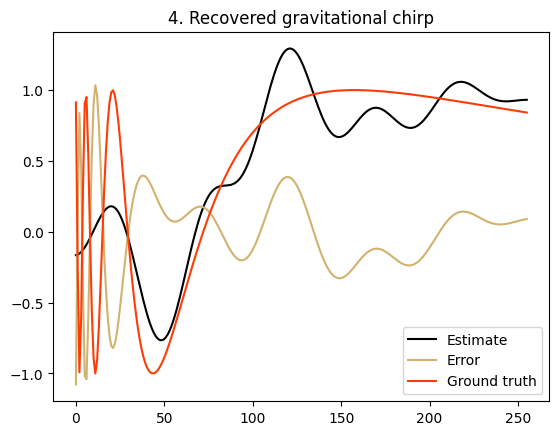

In [8]:

## Checkpoint IIII: DC restoration and IDCT
FS[0] = DC; IS = idct(FS, norm = 'ortho')
plot(IS, 'k'); plot(IS - s, color = 'xkcd:tan'); plot(s, color = 'xkcd:red orange')
title(f'4. Recovered {name}'); legend(['Estimate', 'Error', 'Ground truth']); show()

———————————————
# Other magic pencils!
* [Zaczarowany ołówek](https://youtu.be/vPFy8QQmf2k?t=176) [PG--] 
* [The Dark Knight](https://www.youtube.com/watch?v=ppOVLojanC8) [R++] 
  * [*"If you're good at something, never do it for free!"*](https://www.imdb.com/title/tt0468569/quotes/?item=qt0484261) 
  * [*"Let's not blow this out of proportion!"*](https://www.imdb.com/title/tt0468569/quotes/?item=qt0484294)